<a href="https://colab.research.google.com/github/asapsui/CatalogAPI/blob/master/Copy_of_Tensorflow_MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification With Tensorflow

In [ ]:
print("hello world")

hello world


MNIST is a dataset of black/white images of hand-drawn digits (numbers 0-9). The goal of this model is to take in an image, and output what number the image is

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# Explore Data

In [ ]:
print(f"{len(x_train)=}")
print(f"{len(x_test)=}")
print(f"{x_train.shape=}")
print(f"{y_train.shape=}")

len(x_train)=60000
len(x_test)=10000
x_train.shape=(60000, 28, 28)
y_train.shape=(60000,)


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

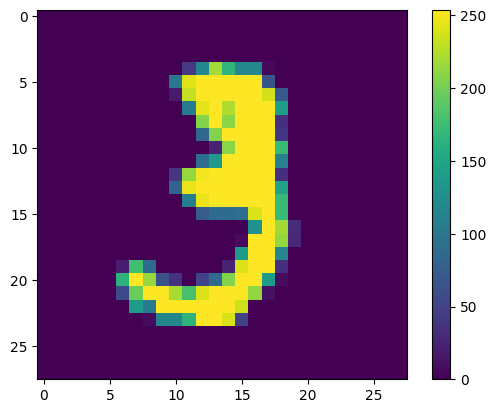

In [ ]:
plt.imshow(x_train[10])
plt.colorbar()

# Data Pre-Processing (Image Normalization)

In [ ]:
def normalize_data(data):
  return data / 255.0

In [ ]:
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

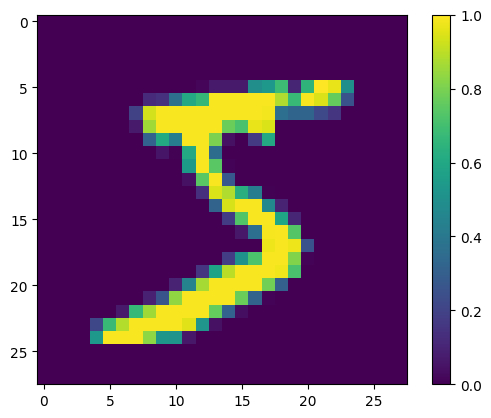

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

# Build a model with Keras Sequential Class

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Layer to convert 28 # 28 matrix to array of size [784 x 1]
    tf.keras.layers.Dense(128, activation='relu'), # Simple Dense Layer whos output is 128
    tf.keras.layers.Dense(10) # Simple Dense Layer that will act as our output layer (size 10 because we have 10 different classes)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [ ]:
model_history = model.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    validation_data=(x_test, y_test),
)

Epoch 1/6
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2622 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.1411 - val_sparse_categorical_accuracy: 0.9591
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9652
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0814 - val_sparse_categorical_accuracy: 0.9751
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0764 - val_sparse_categorical_accuracy: 0.9752
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.0771 - val_sparse_categorical_accuracy: 0.9765
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - sparse_cat

# Analyze Performance

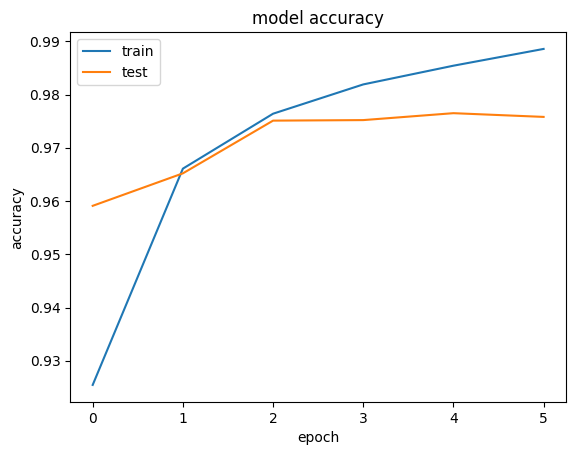

In [ ]:
plt.plot(model_history.history['sparse_categorical_accuracy'])
plt.plot(model_history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

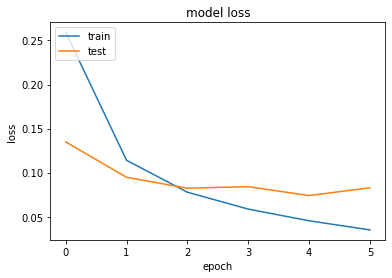

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test Model

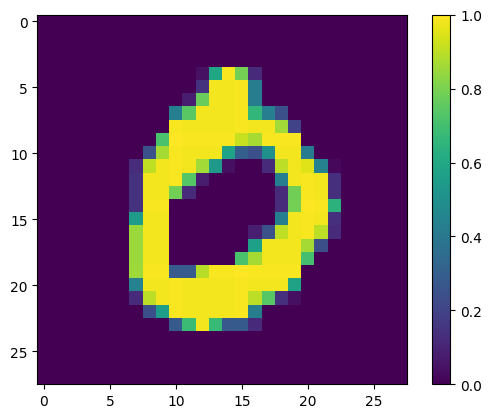

In [ ]:
plt.imshow(x_test[3])
plt.colorbar()

In [ ]:
def make_prediction(model, image):
  model_output = model(image.reshape((-1, 28, 28)))
  plt.imshow(image)
  plt.colorbar()
  return model_output.numpy().argmax()

4

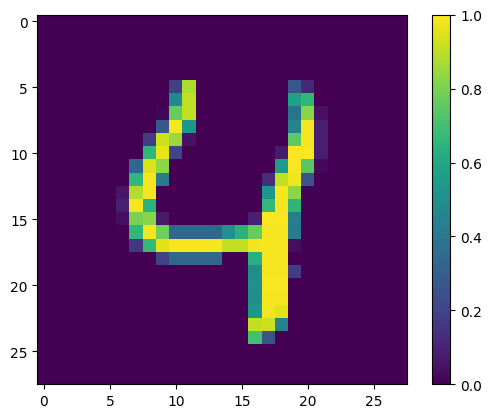

In [ ]:
make_prediction(model,  x_test[4])